# 회귀를 이용한 예측: 차원축소

## PCA

### PCR 분석에 적합한 데이터셋은 어떤 특성을 가지고 있어야 하는가?
1. **다중공선성이 높은 데이터셋**
* 설명변수들 간의 상관관계가 높아서 선형회귀분석을 하면 문제가 발생하는 경우
* PCA를 통해 이렇게 높은 상관관계를 제거하고, 주성분으로 차원을 축소한 후 회귀분석을 수행할 수 있다.
2. **고차원 데이터셋 (Feature가 많은 경우)**
* 설명변수[Feature]의 수가 많아서 차원축소가 필요할 때
* 데이터의 차원이 너무 많으면 과적합(overfitting) 문제가 발생할 수 있으므로, PCA를 활용해 주성분만 선택할 수 있다.
3. **연속형 반응변수를 가지는 데이터셋**
* 예측하려는 변수[반응변수]가 연속적인 값을 가진 경우

### 적합한 데이터셋의 예시
1. **Boston Housing Dataset**
2. **California Housing Dataset**
3. **Wine Quality Dataset**
4. **Energy Efficiency Dataset(건물 에너지 효율 예측)**
- https://archive.ics.uci.edu/dataset/242/energy+efficiency

### Energy Efficiency Dataset을 사용해 보자.

In [24]:
import pandas as pd

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

In [38]:
df = pd.read_excel(url)   # [Q] pandas 라이브러리의 read_excel() 함수를 적용한 df의 type은 무엇일까?

In [39]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [40]:
print(df.shape)   # [Q] df에는 몇 개의 샘플과 변수가 있을까? 변수들을 Features와 target으로 구분해 보자.

(768, 10)


In [41]:
print(df.describe())   # [Q] Features: X1 ~ X8, Target Variables: Y1, Y2 ===> 각 변수는 무엇인가? 변수에 대한 설명이 필요하다.

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

In [42]:
df.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
              "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]   # 변수명을 부여

In [43]:
print(df.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

In [44]:
print(df.describe())   # 변수별 요약통계량을 확인해 보자.

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [98]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font', family='AppleGothic')

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정: Windows의 경우 'Malgun Gothic' 사용
#plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

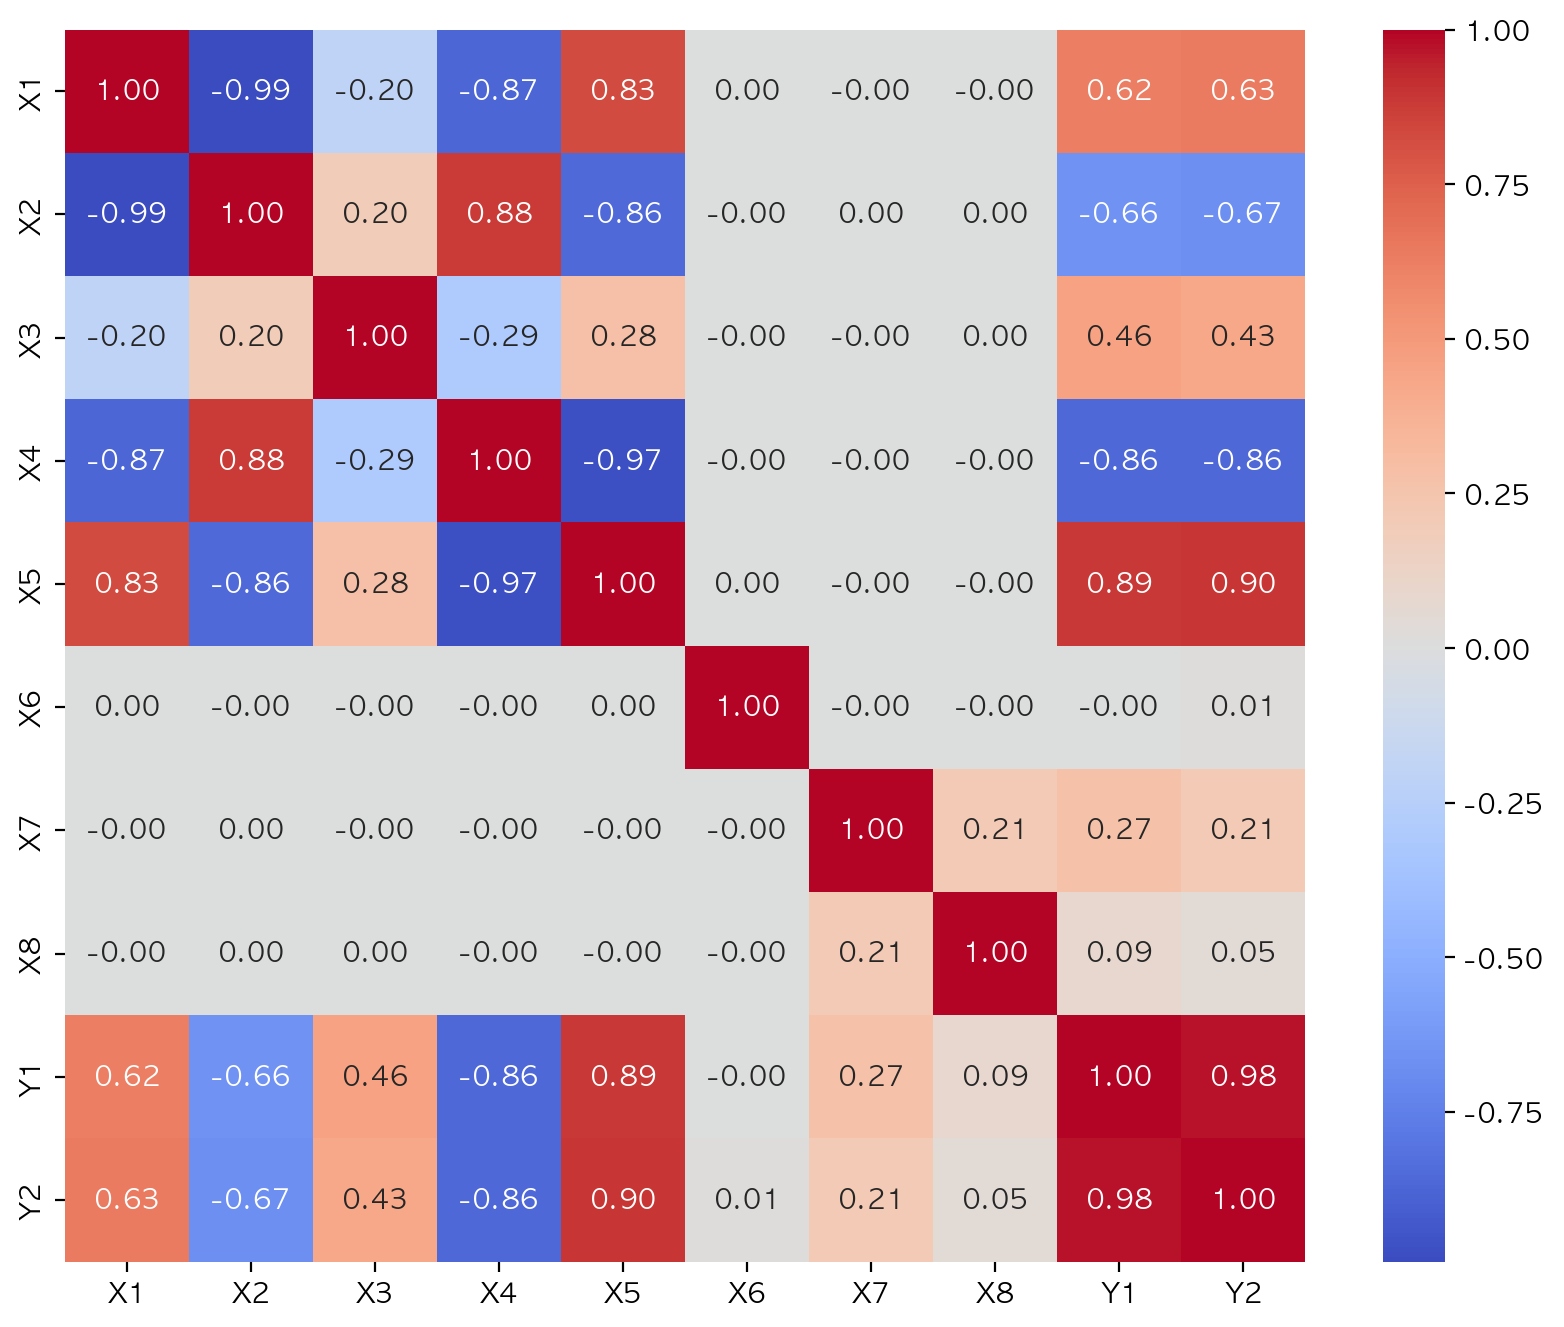

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## PCA

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [48]:
# 독립 변수(X)와 종속 변수(Y) 분리
X = df.iloc[:, :-2]   # 마지막 두 열(Y1, Y2) 제외
y = df.iloc[:, -2]    # 난방 부하 (Heating Load) 예측

In [49]:
# 데이터 스케일링 (PCA는 변수 크기에 민감하므로 표준화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_scaled[1:5, 1:5]

array([[-1.78587489, -0.56195149, -1.47007664,  1.        ],
       [-1.78587489, -0.56195149, -1.47007664,  1.        ],
       [-1.78587489, -0.56195149, -1.47007664,  1.        ],
       [-1.22923856,  0.        , -1.19867787,  1.        ]])

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

In [52]:
# 각 주성분이 설명하는 분산 비율 계산
explained_variance_full = pca_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

In [53]:
print(explained_variance_full)

[0.46286741 0.15498141 0.15162053 0.125      0.09837947 0.00659424
 0.00055694 0.        ]


In [19]:
print(cumulative_variance_full)

[0.46286741 0.61784882 0.76946935 0.89446935 0.99284882 0.99944306
 1.         1.        ]


In [20]:
# 주성분별 설명된 분산 출력
for i, (ev, cum_ev) in enumerate(zip(explained_variance_full, cumulative_variance_full), start=1):
    print(f"Principal Component {i}: 설명된 분산 비율 = {ev:.4f}, 누적 = {cum_ev:.4f}")

Principal Component 1: 설명된 분산 비율 = 0.4629, 누적 = 0.4629
Principal Component 2: 설명된 분산 비율 = 0.1550, 누적 = 0.6178
Principal Component 3: 설명된 분산 비율 = 0.1516, 누적 = 0.7695
Principal Component 4: 설명된 분산 비율 = 0.1250, 누적 = 0.8945
Principal Component 5: 설명된 분산 비율 = 0.0984, 누적 = 0.9928
Principal Component 6: 설명된 분산 비율 = 0.0066, 누적 = 0.9994
Principal Component 7: 설명된 분산 비율 = 0.0006, 누적 = 1.0000
Principal Component 8: 설명된 분산 비율 = 0.0000, 누적 = 1.0000


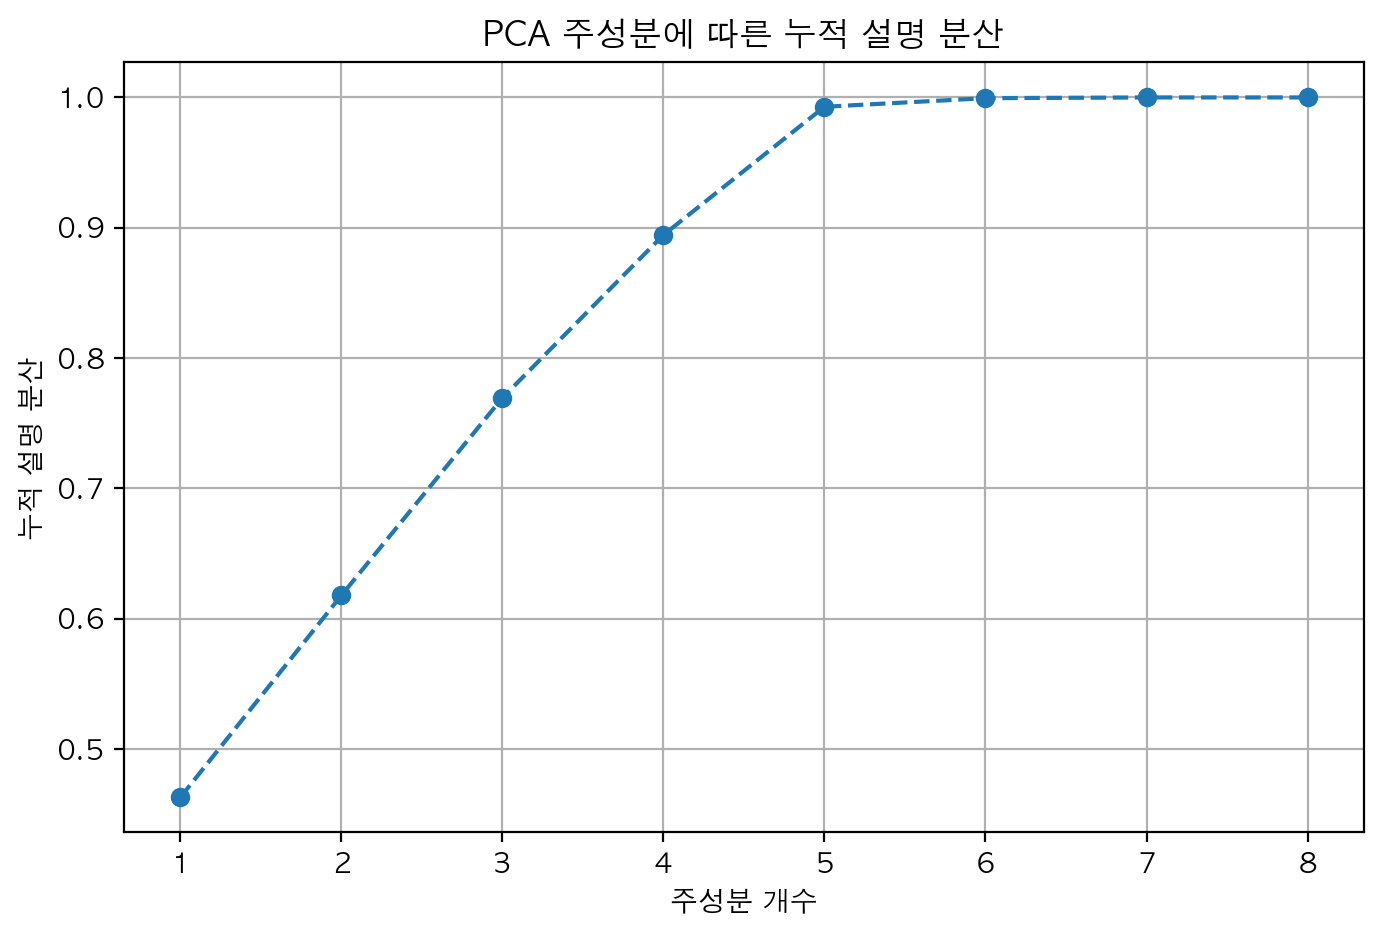

In [59]:
# 누적 설명된 분산 시각화
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산')
plt.title('PCA 주성분에 따른 누적 설명 분산')
plt.grid(True)
plt.show()

In [74]:
# 8개의 주성분 중, 설명력을 95% 이상 유지하는 차원 선택
pca = PCA(n_components=0.95)   # 누적 설명 분산 비율이 95% 이상이 되도록 자동 선택
X_pca = pca.fit_transform(X_scaled)

In [75]:
# 주성분 개수 확인
print(f"선택된 주성분 개수: {pca.n_components_}")

선택된 주성분 개수: 5


## PCR

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [78]:
# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # test mse..
r2 = r2_score(y_test, y_pred)

In [80]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score : {r2:.2f}")

Mean Squared Error (MSE): 13.54
R2 Score : 0.87


## PLS

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# 데이터 스케일링 (PLS는 변수 스케일에 민감하므로 표준화 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# 최적의 PLS 주성분(n_components) 선택을 위한 교차 검증
# 가능한 주성분 개수는 1부터 설명변수 개수(여기서는 8)까지 고려합니다.
mse_cv = []
n_components_range = range(1, X_train_scaled.shape[1] + 1)

In [85]:
for n in n_components_range:
    pls_temp = PLSRegression(n_components=n)
    # 10-Fold 교차 검증에서 음의 평균 제곱 오차를 구합니다.
    scores = cross_val_score(pls_temp, X_train_scaled, y_train, cv=10, scoring="neg_mean_squared_error")
    mse_cv.append(-np.mean(scores))
    print(f"n_components = {n}, 교차 검증 MSE = {-np.mean(scores):.4f}")

n_components = 1, 교차 검증 MSE = 23.1880
n_components = 2, 교차 검증 MSE = 11.6883
n_components = 3, 교차 검증 MSE = 11.0003
n_components = 4, 교차 검증 MSE = 9.2733
n_components = 5, 교차 검증 MSE = 8.6769
n_components = 6, 교차 검증 MSE = 8.6741
n_components = 7, 교차 검증 MSE = 8.5790
n_components = 8, 교차 검증 MSE = 45501.7672


In [86]:
# 최적의 주성분 개수 선택 (MSE가 최소일 때)
optimal_n = np.argmin(mse_cv) + 1
print("\n최적의 주성분 개수:", optimal_n)


최적의 주성분 개수: 7


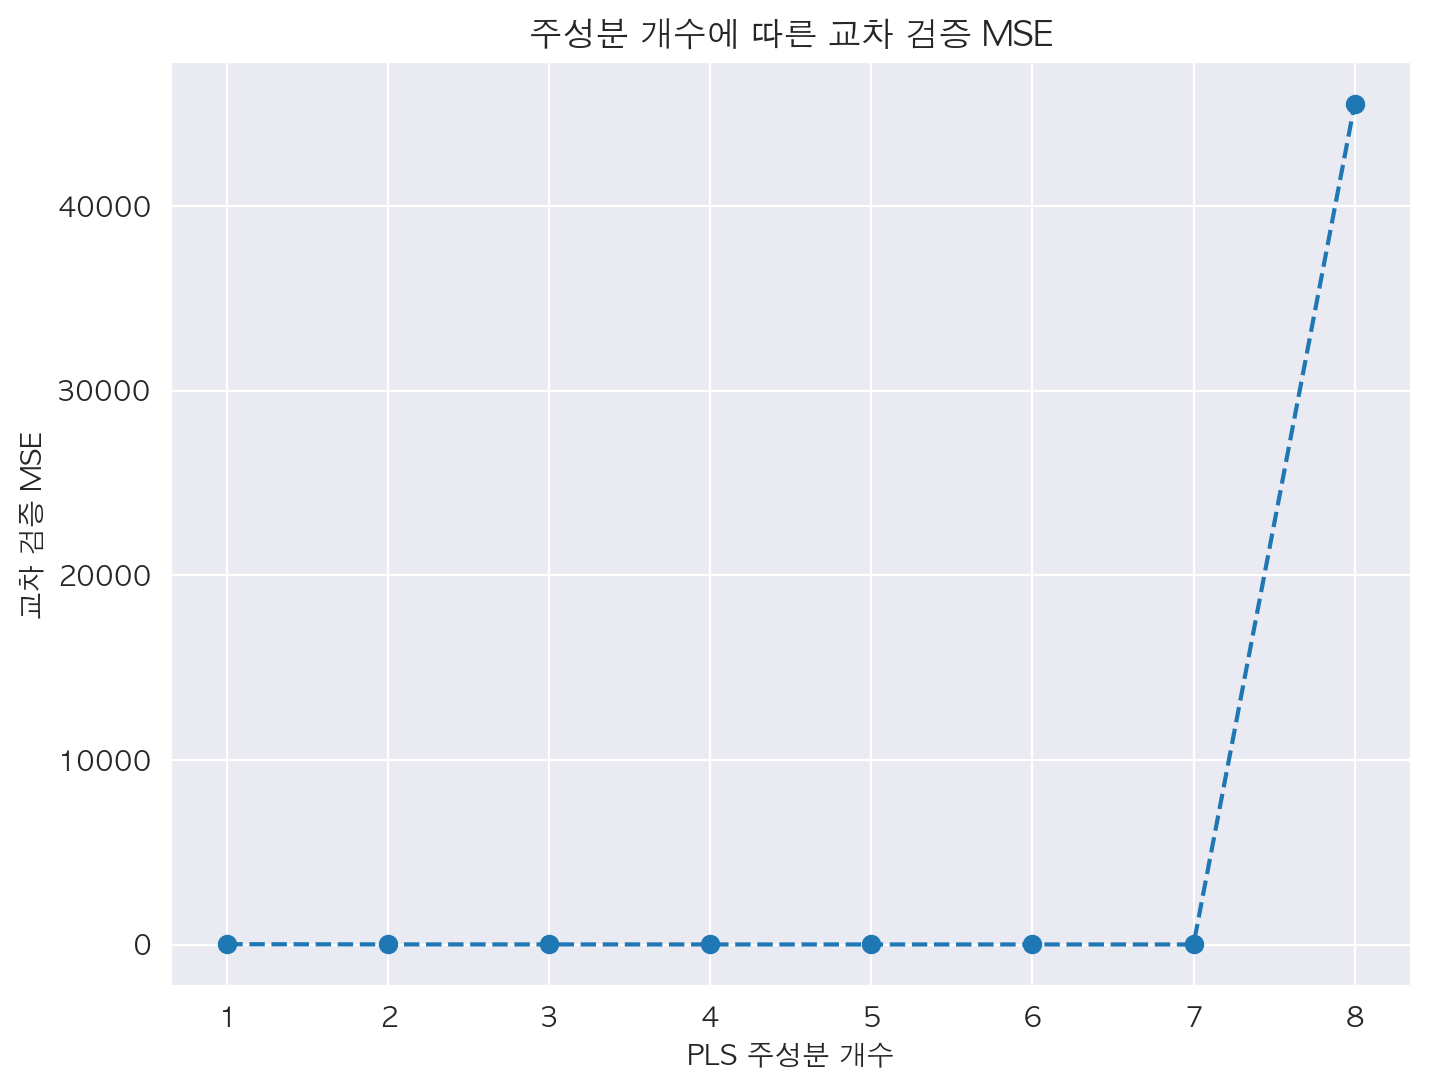

In [100]:
# 주성분 개수에 따른 교차 검증 MSE 시각화
plt.figure(figsize=(8,6))
plt.plot(n_components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel('PLS 주성분 개수')
plt.ylabel('교차 검증 MSE')
plt.title('주성분 개수에 따른 교차 검증 MSE')
plt.grid(True)
plt.show()

In [101]:
# 최적의 주성분 개수를 사용하여 PLS 회귀 모델 학습
pls_opt = PLSRegression(n_components=optimal_n)
pls_opt.fit(X_train_scaled, y_train)

PLSRegression(n_components=np.int64(7))

In [102]:
# 테스트 데이터셋에 대한 예측 및 평가
y_pred_opt = pls_opt.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_opt)
r2_test = r2_score(y_test, y_pred_opt)

In [103]:
print("\nPLS 회귀 모델 성능 (최적 주성분 사용):")
print("테스트 MSE:", mse_test)
print("테스트 R2 Score:", r2_test)


PLS 회귀 모델 성능 (최적 주성분 사용):
테스트 MSE: 9.153207645941672
테스트 R2 Score: 0.9121846294352438


In [91]:
# PLS 회귀 모델 구축 및 학습
# n_components는 사용할 주성분의 수입니다. (여기서는 2개로 설정)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train_scaled, y_train)

PLSRegression()

In [104]:
# 테스트 데이터셋에 대한 예측
y_pred_2 = pls_2.predict(X_test_scaled)

In [105]:
# 모델 평가 (MSE와 R2 Score)
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)

In [106]:
print("PLS 회귀 모델 성능:")
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

PLS 회귀 모델 성능:
Mean Squared Error (MSE): 13.070415895630678
R2 Score: 0.8746031490043615
